## 3b. Remove lick artifacts in Ripple Band LFP.
Run this notebook only after artifact detection has been run in notebook `Basic Ephys`.
#### This notebook removes 2 kinds of artifact:
1. Lick artifact: these are detected as simultaneous spikes across >50% channels.
2. Head banging/chewing artifact: these do not manifest in spike band, but in the broadband LFP. These are detected by first standardize broadband LFP, and are flagged as moments where there are simultaneous crossing >2SD (<-2SD, using >2SD can let ripples with large Sharp Wave component be detected as artifact. Since we rarely record from below the cell layer, <-2SD is a safer option than absolute >2SD) across 80% of electrodes.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import spyglass as nd
import datajoint as dj
import multiprocessing

# ignore datajoint+jupyter async warnings
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)
warnings.simplefilter('ignore', category=UserWarning)

import matplotlib.pyplot as plt

In [3]:
# We also import a bunch of tables so that we can call them easily
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.shijiegu.load import load_session_name,load_maze_spike,load_LFP,load_position
from spyglass.shijiegu.Analysis_SGU import EpochPos
from spyglass.shijiegu.ripple_detection import loadRippleLFP_OneChannelPerElectrode

# The workhorse of the experiment
from spyglass.shijiegu.ripple_detection import removeArtifactInFilteredData
from spyglass.common import IntervalList

[2025-06-13 06:17:55,903][INFO]: DataJoint 0.14.4 connected to shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [4]:
from spyglass.shijiegu.Analysis_SGU import LFPBandArtifact

### The only cell to be edited:

In [47]:
nwb_file_name = 'klein20231111.nwb'#'haydn20230608.nwb'

### Run the rest

In [48]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [49]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)
print(session_interval)

['02_Rev2Session1', '04_Rev2Session2', '06_Rev2Session3', '08_Rev2Session4', '10_Rev2Session5']


In [50]:
for s in session_interval:
    removeArtifactInFilteredData(nwb_copy_file_name, s,
                             filter_name = 'Ripple 150-250 Hz',broadband_zscore = -1)

#for s in sleep_interval:
#    removeArtifactInFilteredData(nwb_copy_file_name, s,
#                             filter_name = 'Ripple 150-250 Hz',broadband_zscore = -1)

[2025-06-14 18:24:00,251][WARNING]: Skipped checksum for file with hash: 85d7d794-4e05-1197-97c5-fa14ea7a55cc, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_FGAB6Y3XKX.nwb
[18:24:10][INFO] Spyglass: Writing new NWB file klein20231111_0RCZ4SO9JC.nwb...
INFO:spyglass:Writing new NWB file klein20231111_0RCZ4SO9JC.nwb...
[2025-06-14 18:24:12,116][WARNING]: Skipped checksum for file with hash: 85d7d794-4e05-1197-97c5-fa14ea7a55cc, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_FGAB6Y3XKX.nwb


Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54 63]




[2025-06-14 18:24:25,370][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:24:25,391][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:24:25,396][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:24:53,930][WARNING]: Skipped checksum for file with hash: fb9ee62c-3c67-8b50-71ba-50ca7d40e167, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_UYME8X4EKS.nwb
[18:25:08][INFO] Spyglass: Writing new NWB file klein20231111_0JF24JK9A3.nwb...
INFO:spyglass:Writing new NWB file klein20231111_0JF24JK9A3.nwb...
[2025-06-14 18:25:10,495][WARNING]: Skipped checksum for file with hash: fb9ee62c-3c67-8b50-71ba-50ca7d40e167, an

Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54 63]




[2025-06-14 18:25:23,888][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:25:23,907][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:25:23,913][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:25:47,903][WARNING]: Skipped checksum for file with hash: 10ab6bf6-9cdf-52cb-1d1e-479e409f7cd6, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_YJCNI7PUI4.nwb
[18:26:02][INFO] Spyglass: Writing new NWB file klein20231111_Y0Y80IEUVR.nwb...
INFO:spyglass:Writing new NWB file klein20231111_Y0Y80IEUVR.nwb...
[2025-06-14 18:26:04,225][WARNING]: Skipped checksum for file with hash: 10ab6bf6-9cdf-52cb-1d1e-479e409f7cd6, an

Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54 63]




[2025-06-14 18:26:20,204][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:26:20,223][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:26:20,229][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:26:50,927][WARNING]: Skipped checksum for file with hash: 2c36319f-5cc2-8508-4e9f-864621ccce33, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_7FRDESQ4OA.nwb
[18:27:01][INFO] Spyglass: Writing new NWB file klein20231111_PIHG5928CC.nwb...
INFO:spyglass:Writing new NWB file klein20231111_PIHG5928CC.nwb...
[2025-06-14 18:27:03,457][WARNING]: Skipped checksum for file with hash: 2c36319f-5cc2-8508-4e9f-864621ccce33, an

Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54 63]




[2025-06-14 18:27:19,556][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:27:19,578][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:27:19,584][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:27:39,608][WARNING]: Skipped checksum for file with hash: c0d534b2-1170-c1ce-10e4-3065fcc31a74, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_4KY66ZF7UM.nwb
[18:27:53][INFO] Spyglass: Writing new NWB file klein20231111_9QDJ1BVGW0.nwb...
INFO:spyglass:Writing new NWB file klein20231111_9QDJ1BVGW0.nwb...
[2025-06-14 18:27:54,803][WARNING]: Skipped checksum for file with hash: c0d534b2-1170-c1ce-10e4-3065fcc31a74, an

Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54 63]




[2025-06-14 18:28:08,504][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:28:08,523][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb
[2025-06-14 18:28:08,528][WARNING]: Skipped checksum for file with hash: a55656b6-b2e0-1d76-3426-2d1e2a004d6c, and path: /stelmo/nwb/analysis/klein20231111/klein20231111_33JZBX5GC2.nwb


In [42]:
s

'08_Rev2Session4'

In [43]:
from spyglass.common import LFPBand

In [51]:
(LFPBand & {'nwb_file_name': nwb_copy_file_name,'filter_name': 'Ripple 150-250 Hz'})

nwb_file_name name of the NWB file,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,target_interval_list_name descriptive name of this interval list,lfp_band_sampling_rate the sampling rate for this band,analysis_file_name name of the file,interval_list_name descriptive name of this interval list,filtered_data_object_id the NWB object ID for loading this object from the file
klein20231111_.nwb,Ripple 150-250 Hz,1000,02_Rev2Session1,1000,klein20231111_FGAB6Y3XKX.nwb,02_Rev2Session1 lfp band 1000Hz,1c21fd75-5c62-4d44-b48a-023d04b738f1
klein20231111_.nwb,Ripple 150-250 Hz,1000,04_Rev2Session2,1000,klein20231111_UYME8X4EKS.nwb,04_Rev2Session2 lfp band 1000Hz,8d7d26ba-0879-4966-900e-1de197701298
klein20231111_.nwb,Ripple 150-250 Hz,1000,06_Rev2Session3,1000,klein20231111_YJCNI7PUI4.nwb,06_Rev2Session3 lfp band 1000Hz,231cb285-98cf-4bb5-afbe-196a9bb6b6db
klein20231111_.nwb,Ripple 150-250 Hz,1000,08_Rev2Session4,1000,klein20231111_7FRDESQ4OA.nwb,08_Rev2Session4 lfp band 1000Hz,772a74b9-1e4a-4583-a182-184d526fa9a5
klein20231111_.nwb,Ripple 150-250 Hz,1000,10_Rev2Session5,1000,klein20231111_4KY66ZF7UM.nwb,10_Rev2Session5 lfp band 1000Hz,81b96747-a66d-4658-8d86-fdabacbde5c2


In [52]:
#%debug

In [53]:
(LFPBandArtifact() & {"nwb_file_name": nwb_copy_file_name})#.delete()

nwb_file_name name of the NWB file,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,target_interval_list_name descriptive name of this interval list,lfp_band_sampling_rate the sampling rate for this band,artifact_params_name a name for this set of encoding,analysis_nwb_file_name name of the file
klein20231111_.nwb,Ripple 150-250 Hz,1000,02_Rev2Session1,1000,ampl_100_prop_05_2ms,klein20231111_0RCZ4SO9JC.nwb
klein20231111_.nwb,Ripple 150-250 Hz,1000,04_Rev2Session2,1000,ampl_100_prop_05_2ms,klein20231111_0JF24JK9A3.nwb
klein20231111_.nwb,Ripple 150-250 Hz,1000,06_Rev2Session3,1000,ampl_100_prop_05_2ms,klein20231111_Y0Y80IEUVR.nwb
klein20231111_.nwb,Ripple 150-250 Hz,1000,08_Rev2Session4,1000,ampl_100_prop_05_2ms,klein20231111_PIHG5928CC.nwb
klein20231111_.nwb,Ripple 150-250 Hz,1000,10_Rev2Session5,1000,ampl_100_prop_05_2ms,klein20231111_9QDJ1BVGW0.nwb


### Sanitycheck: at least the referencing etc should be the same. 
Some moments might be empty due to artifact removal

In [26]:
from spyglass.shijiegu.Analysis_SGU import TrialChoice
from spyglass.shijiegu.load import load_LFP

In [27]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)
target_interval = session_interval[0]

position_valid_times = (IntervalList & {'nwb_file_name': nwb_copy_file_name,
                                        'interval_list_name': target_interval}).fetch1('valid_times')

filtered_lfps, filtered_lfps_t, CA1TetrodeInd, CCTetrodeInd = loadRippleLFP_OneChannelPerElectrode(
        nwb_copy_file_name,target_interval,position_valid_times,'artifact removed filtered data',1)

(filtered_lfps_raw, _,
 _2, _3) = loadRippleLFP_OneChannelPerElectrode(
     nwb_copy_file_name,
     target_interval,position_valid_times,'filtered data',1)

Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54]




[2025-06-14 12:45:49,015][WARNING]: Skipped checksum for file with hash: b13854c6-6022-3cbe-02ed-00ffc5206cee, and path: /stelmo/nwb/analysis/klein20231113/klein20231113_G333K4MBJK.nwb


Using LFP from these eletrodes: 
[ 0  8 10 11 12 15 16 28 30 36 45 52 53 54]




In [73]:
"""Get broad band LFP"""
lfp,lfp_t = load_LFP(nwb_copy_file_name,target_interval)

lfp_df = pd.DataFrame(data=lfp[:,CA1TetrodeInd], index=lfp_t)
lfp_df.index.name='time'
lfp_df=xr.Dataset.from_dataframe(lfp_df)

[2025-06-01 22:06:33,348][WARNING]: Skipped checksum for file with hash: 818a6135-3a88-c019-ee86-5c179a8f2ac2, and path: /stelmo/nwb/analysis/klein20231106/klein20231106_U7PSV1VOVE.nwb
[2025-06-01 22:06:33,368][WARNING]: Skipped checksum for file with hash: 818a6135-3a88-c019-ee86-5c179a8f2ac2, and path: /stelmo/nwb/analysis/klein20231106/klein20231106_U7PSV1VOVE.nwb
[2025-06-01 22:06:33,374][WARNING]: Skipped checksum for file with hash: 818a6135-3a88-c019-ee86-5c179a8f2ac2, and path: /stelmo/nwb/analysis/klein20231106/klein20231106_U7PSV1VOVE.nwb


In [54]:
CA1TetrodeInd

[0, 4, 8, 13, 16, 20, 25, 29, 33, 37, 42, 46, 51]

In [55]:
CCTetrodeInd

[24, 41]

In [56]:
lfp.shape

(22117833, 54)

#### 1. simple things

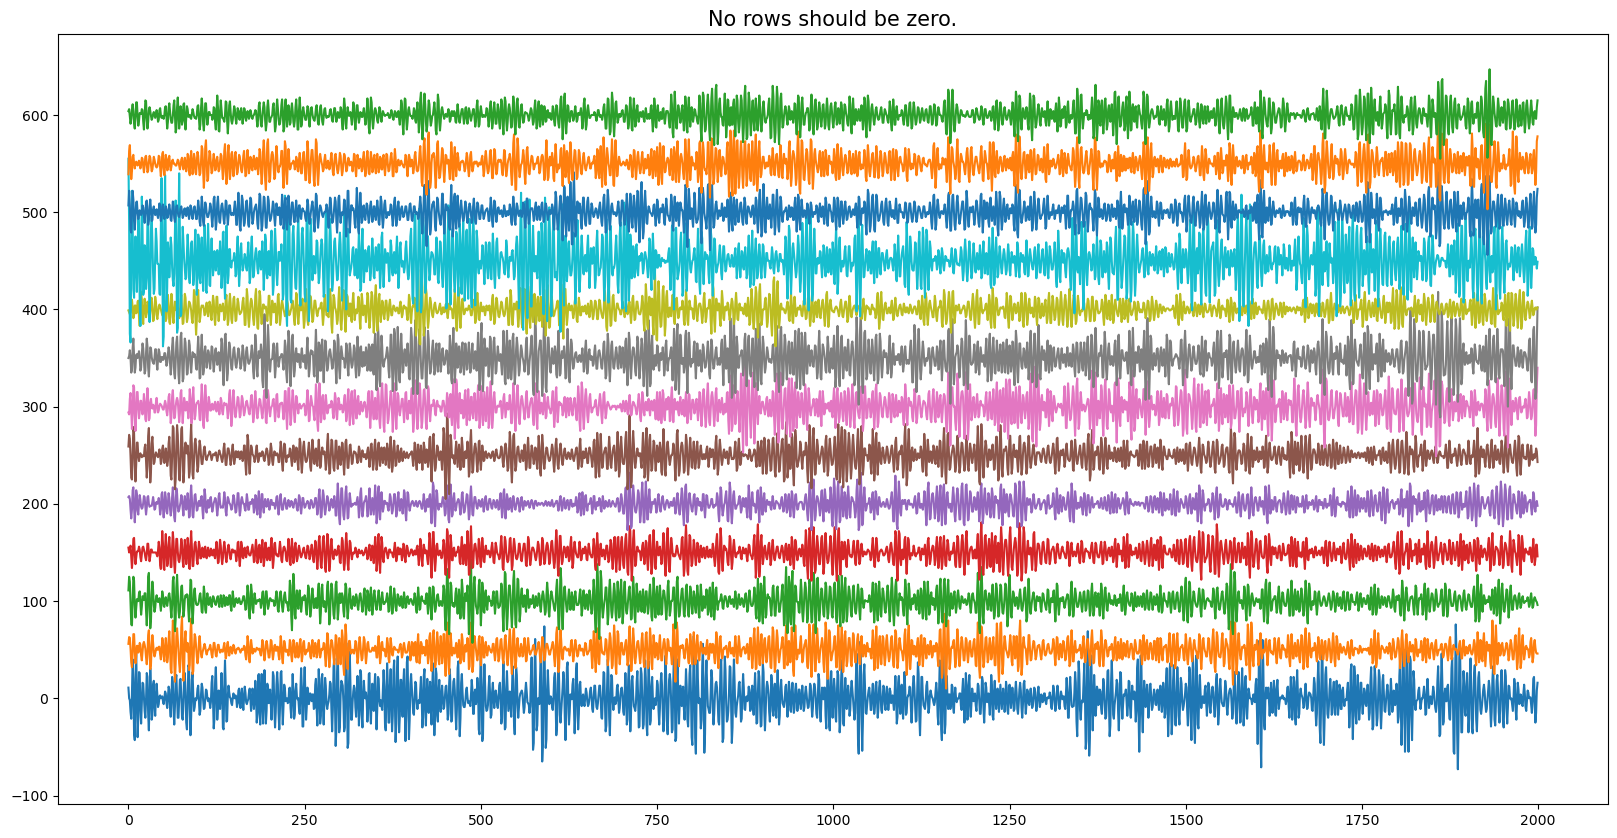

In [57]:
plt.subplots(ncols=1,nrows=1,figsize=(20,10))
r_ind = 0
for i in CA1TetrodeInd:
    
    plt.plot(filtered_lfps[1126234:1128234,i]+r_ind*50);
    #plt.plot(filtered_lfps[60000:61000,i]+r_ind*50);
    r_ind += 1;
plt.title('No rows should be zero.',size = 15);

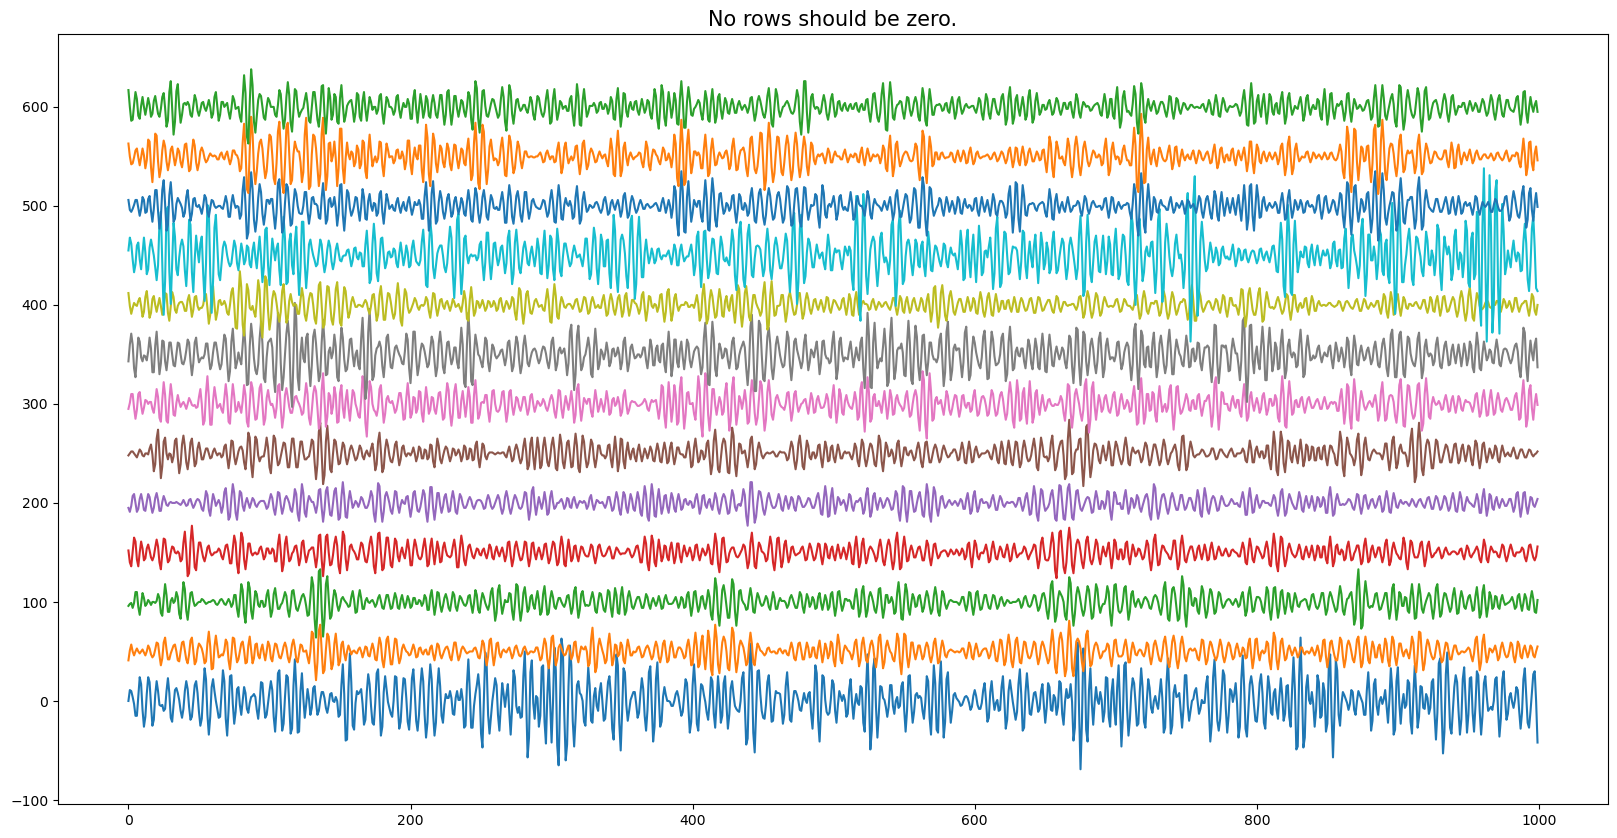

In [58]:
plt.subplots(ncols=1,nrows=1,figsize=(20,10))
r_ind = 0
for i in CA1TetrodeInd:
    
    #plt.plot(filtered_lfps[1126234:1128234,i]+r_ind*50);
    plt.plot(filtered_lfps_raw[60000:61000,i]+r_ind*50);
    r_ind += 1;
plt.title('No rows should be zero.',size = 15);

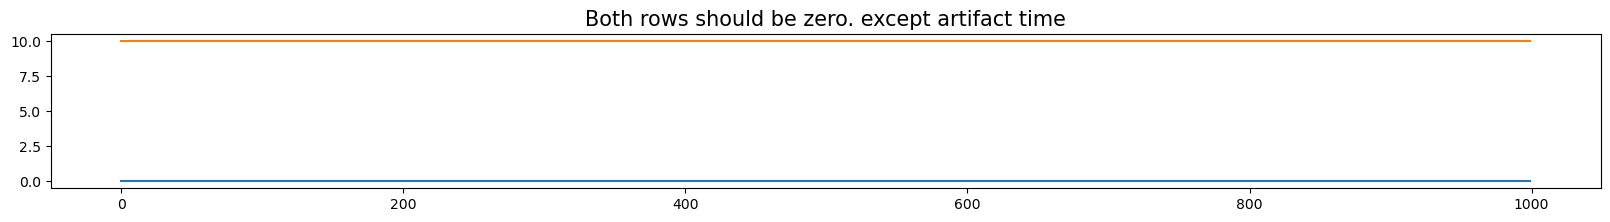

In [59]:
plt.subplots(ncols=1,nrows=1,figsize=(20,2))
r_ind = 0
for i in CCTetrodeInd:
    plt.plot(filtered_lfps_raw[60000:61000,i]+r_ind*10);
    r_ind += 1;
plt.title('Both rows should be zero. except artifact time',size = 15);

### 2. Find some artifact time

In [26]:
# This line takes a long time, 10 min
neural_data,neural_ts,mua_time,mua,channel_IDs = load_maze_spike(nwb_copy_file_name,
                                                                 target_interval)

In [27]:
print(f"The range of neural data is: from {neural_ts[0][0]} to {neural_ts[0][-1]}")

The range of neural data is: from 1691777873.337648 to 1691779778.923979


In [28]:
SMALLEST = np.iinfo(filtered_lfps.dtype).min + 1
drop_ind = np.unique(np.argwhere(filtered_lfps <= SMALLEST)[:,0])

In [29]:
artifact_ind = int(len(drop_ind)/2)+5

delta = int(1000*0.5)
[t0, t1] = [filtered_lfps_t[drop_ind[artifact_ind] - delta],
            filtered_lfps_t[drop_ind[artifact_ind] + delta]]
print([t0,t1])

[1691778542.3608832, 1691778543.3606858]


In [30]:
tind0_lfp

NameError: name 'tind0_lfp' is not defined

/tmp/ipykernel_844713/3670125701.py:18: RuntimeWarning: overflow encountered in scalar subtract
  data = (data - data.mean()) / (data.max() - data.min())


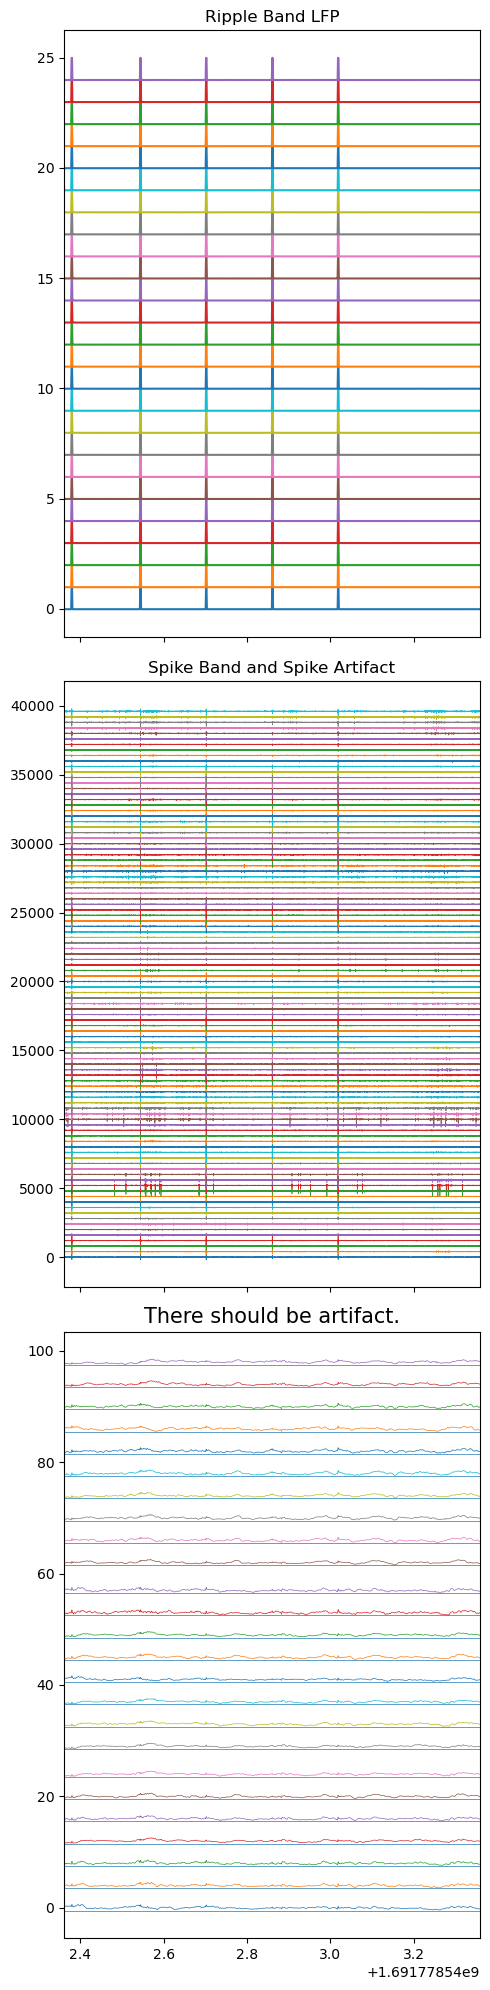

In [31]:
# ripple band
[tind0_lfp, tind1_lfp] = [np.argwhere(filtered_lfps_t >= t0).ravel()[0],
                        np.argwhere(filtered_lfps_t <= t1).ravel()[-1]]
# spike band
[tind0_spike, tind1_spike] = [np.argwhere(neural_ts[0] >= t0).ravel()[0],
                        np.argwhere(neural_ts[0] <= t1).ravel()[-1]]
# broad band
[tind0_broadlfp, tind1_broadlfp] = [np.argwhere(lfp_t >= t0).ravel()[0],
                        np.argwhere(lfp_t <= t1).ravel()[-1]]

fig, axes = plt.subplots(ncols=1,nrows=3,figsize=(5,20),sharex = True)


r_ind = 0
for i in CA1TetrodeInd:
    t_axis = filtered_lfps_t[tind0_lfp: tind1_lfp]
    data = filtered_lfps[tind0_lfp : tind1_lfp, i]
    data = (data - data.mean()) / (data.max() - data.min())
    axes[0].plot(t_axis, data + r_ind*1);
    r_ind += 1;
axes[0].set_title("Ripple Band LFP")


r_ind = 0
for i in range(0,len(channel_IDs),1):
    t_axis = neural_ts[0][tind0_spike : tind1_spike]
    data = neural_data[tind0_spike : tind1_spike, i]
    axes[1].plot(t_axis, data + r_ind*400, linewidth = 0.5);
    r_ind += 1;
axes[1].plot([t0 + delta, t0 + delta],[0,r_ind])


axes[1].set_xlim(t_axis[0],t_axis[-1])

axes[1].set_title("Spike Band and Spike Artifact")

r_ind = 0
for i in CA1TetrodeInd:
    t_axis = lfp_t[tind0_broadlfp : tind1_broadlfp]
    data = lfp[tind0_broadlfp : tind1_broadlfp,i]
    data = (data - data.mean()) / (data.max() - data.min())
    axes[2].axhline(i - 0.5, linewidth = 0.5)
    axes[2].plot(t_axis, data + i, linewidth = 0.5);
    r_ind += 1;
#axes[2].plot([t0 + delta, t0 + delta],[0,r_ind],linewidth = 0.5, alpha = 0.5)

axes[2].set_xlim(t_axis[0],t_axis[-1])

axes[2].set_title("Broad Band LFP and Artifact")

plt.title('There should be artifact.',size = 15);
plt.tight_layout()

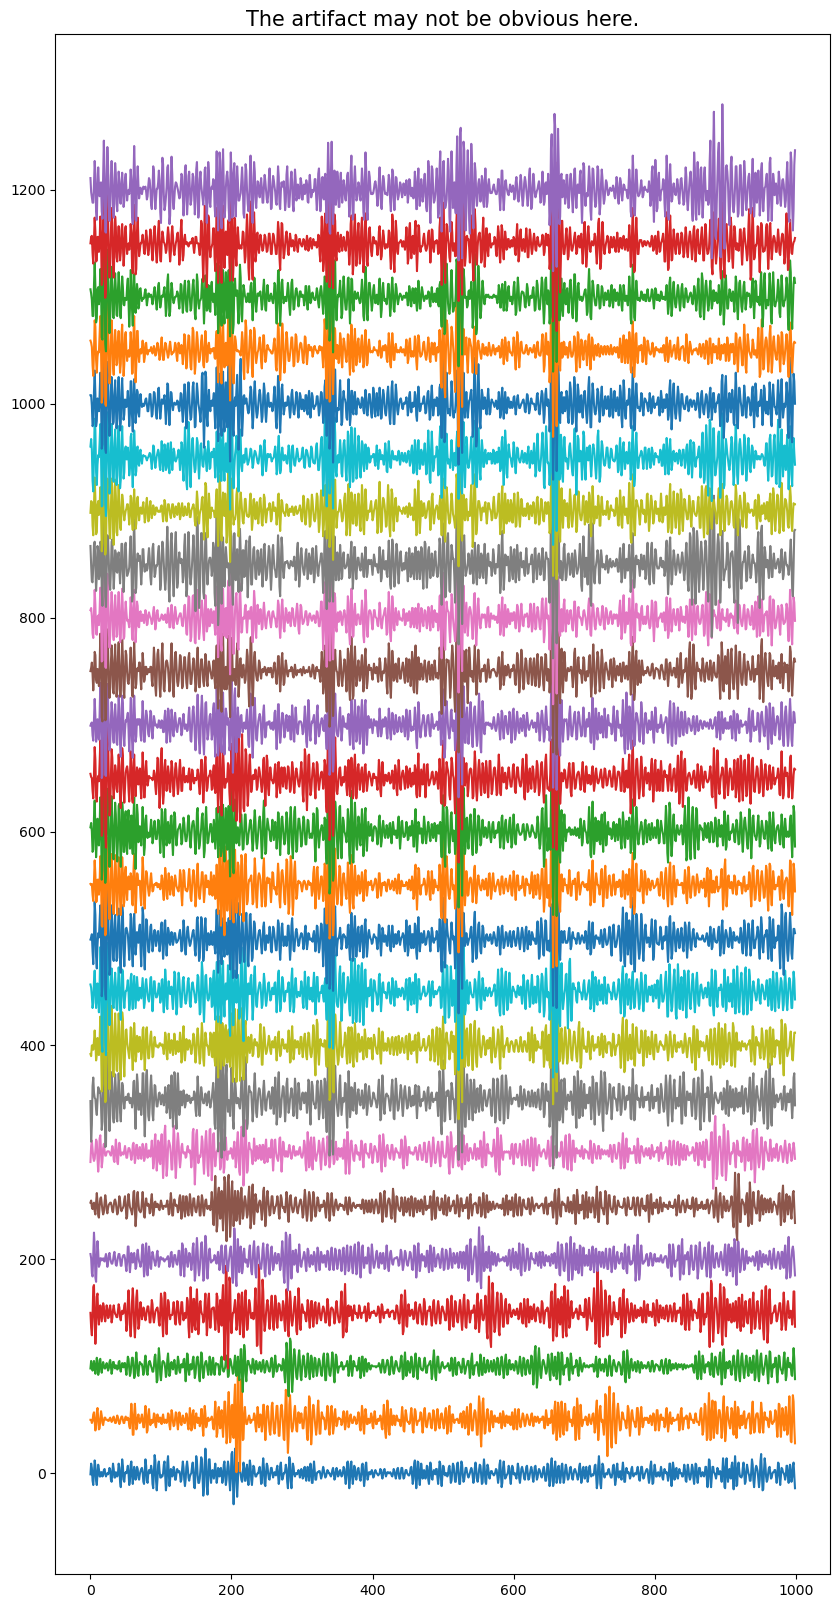

In [32]:
plt.subplots(ncols=1,nrows=1,figsize=(10,20))
r_ind = 0
for i in CA1TetrodeInd:
    plt.plot(filtered_lfps_raw[drop_ind[artifact_ind] - 500 : drop_ind[artifact_ind
             ] + 500,i]+r_ind*50);
    r_ind += 1;
plt.title('The artifact may not be obvious here.',size = 15);

## END HERE